In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

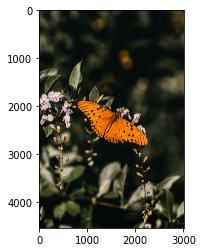

In [5]:
image=cv2.imread("/home/jesterrexx/Downloads/butt.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Prepare data for K-means

In [6]:
pixel_vals=image.reshape((-1,3))
pixel_vals=np.float32(pixel_vals)

# Implement K-means

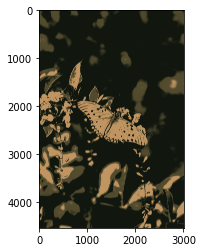

In [7]:
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

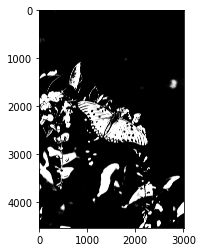

In [8]:
#TODO:Visualize one segment, try to find the background
plt.imshow(labels_reshape==0,cmap='gray')

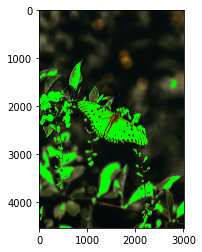

In [9]:
#mask an image segment by cluster
cluster=0
masked_image=np.copy(image)
#turining the mask green
masked_image[labels_reshape==cluster]=[0,255,0]
plt.imshow(masked_image)